In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
dataset

NameError: ignored

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

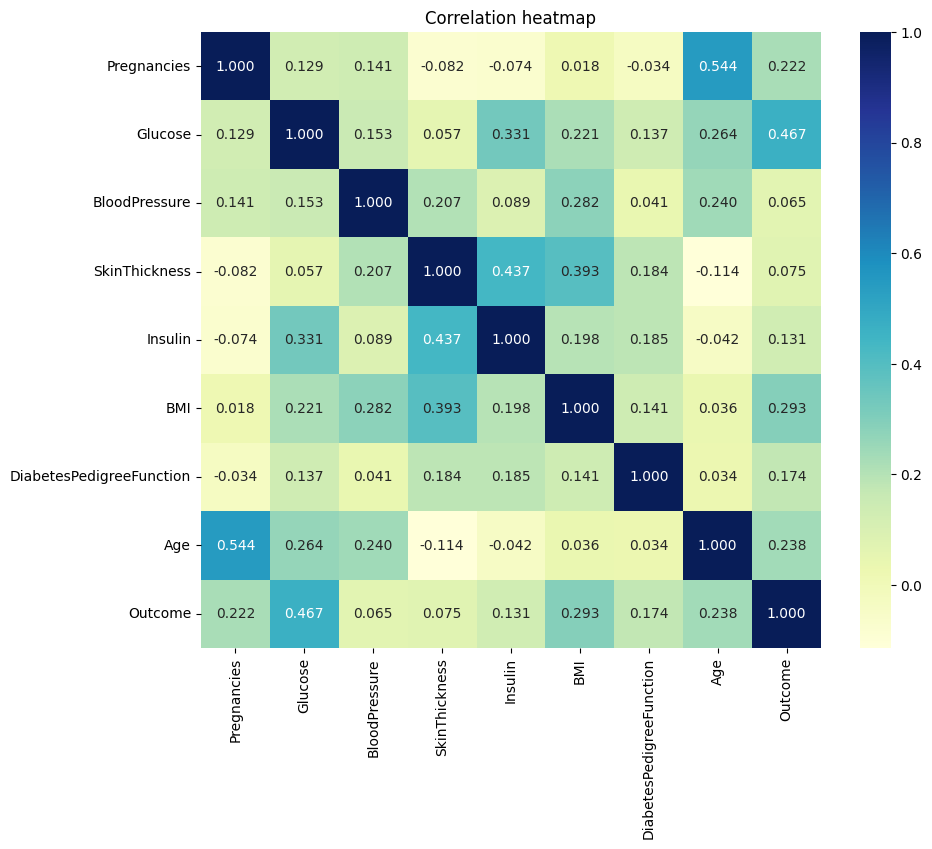

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".3f",cmap="YlGnBu")
plt.title("Correlation heatmap")

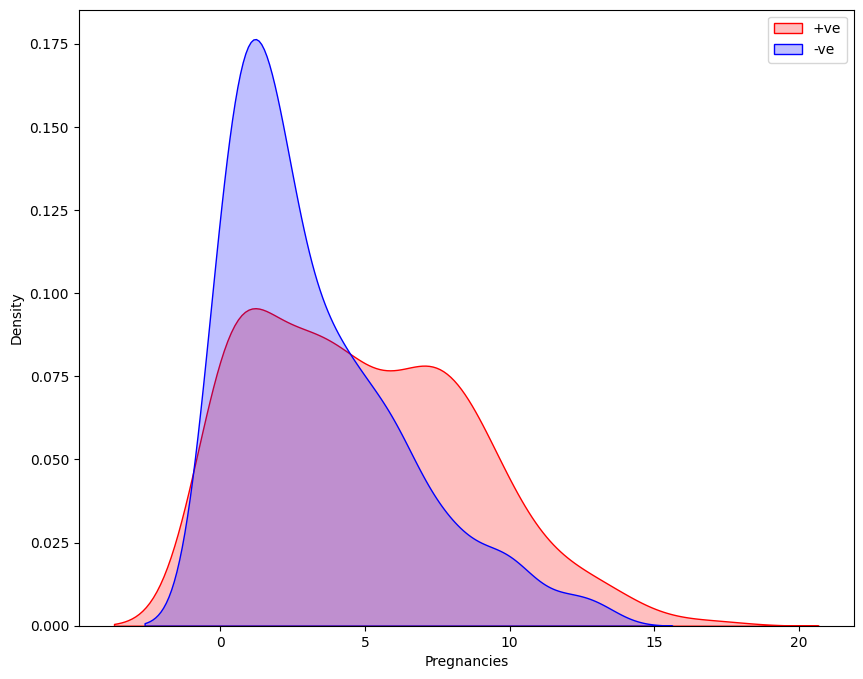

In [ ]:
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="blue",fill=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["+ve","-ve"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

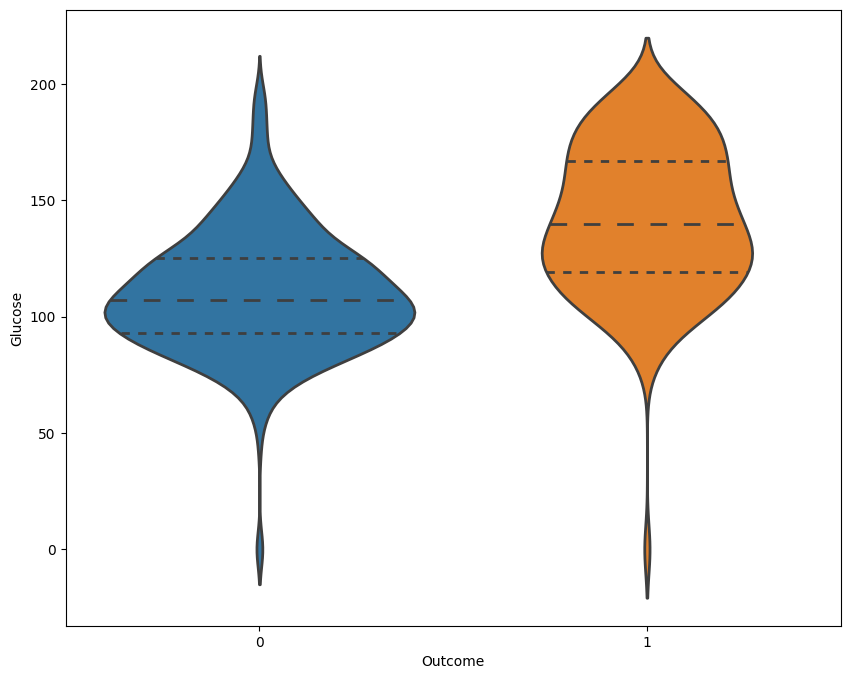

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,linewidth=2,inner="quart")

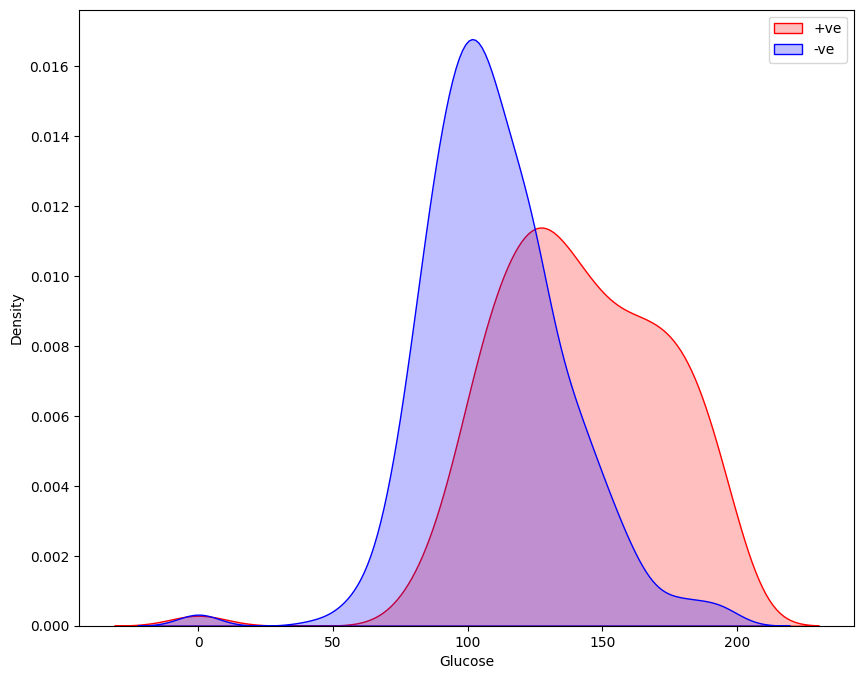

In [ ]:
plt.figure(figsize=(10,8))
kde1=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1],color="Red",fill=True)
kde1=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0],color="blue",fill=True)
kde1.set_xlabel("Glucose")
kde1.set_ylabel("Density")
kde1.legend(["+ve","-ve"])

In [ ]:
dataset["glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].median())
dataset["BloodPressure"]=dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].mean())
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].mean())

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1,148
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0,85
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1,183
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,89
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,137
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0,101
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0,122
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0,121
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1,126


In [ ]:
x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucose
0,6,148,72,35.000000,79.799479,33.6,0.627,50,148
1,1,85,66,29.000000,79.799479,26.6,0.351,31,85
2,8,183,64,20.536458,79.799479,23.3,0.672,32,183
3,1,89,66,23.000000,94.000000,28.1,0.167,21,89
4,0,137,40,35.000000,168.000000,43.1,2.288,33,137
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,101
764,2,122,70,27.000000,79.799479,36.8,0.340,27,122
765,5,121,72,23.000000,112.000000,26.2,0.245,30,121
766,1,126,60,20.536458,79.799479,30.1,0.349,47,126


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucose
464,10,115,98,20.536458,79.799479,24.0,1.022,34,115
223,7,142,60,33.000000,190.000000,28.8,0.687,61,142
393,4,116,72,12.000000,87.000000,22.1,0.463,37,116
766,1,126,60,20.536458,79.799479,30.1,0.349,47,126
570,3,78,70,20.536458,79.799479,32.5,0.270,39,78
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26,139
106,1,96,122,20.536458,79.799479,22.4,0.207,27,96
270,10,101,86,37.000000,79.799479,45.6,1.136,38,101
435,0,141,72,20.536458,79.799479,42.4,0.205,29,141


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train,y_train)
  training_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))

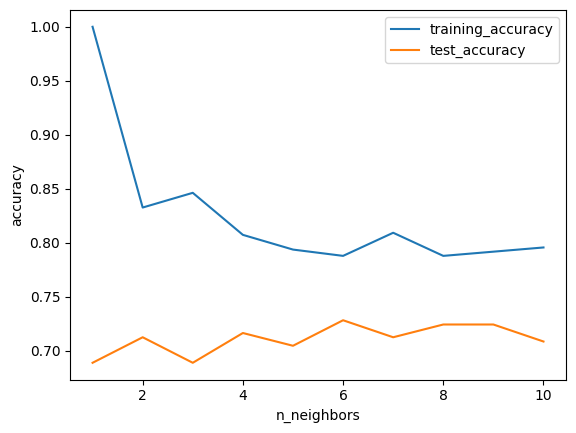

In [ ]:
plt.plot(range(1,11),training_accuracy,label="training_accuracy")
plt.plot(range(1,11),test_accuracy,label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.791828793774319
0.7244094488188977


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,max_depth=4)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": training accuracy")
print(dt.score(x_test,y_test),": test accuracy")

0.8171206225680934 : training accuracy
0.7204724409448819 : test accuracy


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": training accuracy")
print(mlp.score(x_test,y_test),": test accuracy")

0.7587548638132295 : training accuracy
0.6968503937007874 : test accuracy


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [ ]:
x_train_scaled

array([[ 1.89917664, -0.19475093,  2.11027079, ...,  1.60661512,
         0.06905859, -0.23631971],
       [ 0.98286551,  0.64046336, -1.03516641, ...,  0.62609815,
         2.37289284,  0.64911358],
       [ 0.06655438, -0.16381707, -0.04187045, ..., -0.02953111,
         0.32504017, -0.20352588],
       ...,
       [ 1.89917664, -0.62782501,  1.11697483, ...,  1.94028358,
         0.41036736, -0.69543326],
       [-1.1551938 ,  0.6095295 , -0.04187045, ..., -0.78467552,
        -0.35757739,  0.61631975],
       [-1.1551938 ,  0.11458769,  1.94472146, ..., -0.61784129,
        -1.04019494,  0.09161855]])

In [ ]:
mlp1=MLPClassifier(random_state=0)
mlp1.fit(x_train_scaled,y_train)
print(mlp1.score(x_train_scaled,y_train),": training accuracy")
print(mlp1.score(x_test_scaled,y_test),": test accuracy")

0.8404669260700389 : training accuracy
0.7440944881889764 : test accuracy


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
